In [110]:
# custom functions
from load_data import load_data
from col_list import col_list
from clean_data import clean_data
from hospitals_subplots import hospitals_subplots
from hospitals_plot import hospitals_plot

# modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
from datetime import datetime
import scipy.stats as stats
from math import sqrt
import itertools

warnings.filterwarnings('ignore')

nh = 'new_hospitalized'

In [39]:
dir = '~/DSI/covid-symptom-searches/data/'
nrows= None
# usecols = col_list()
symptom = 'search_trends_sore_throat'
usecols = 'date key ' + symptom
usecols = usecols.split()
hospital, searches, _ = load_data(dir,nrows,usecols)

<AxesSubplot:xlabel='date'>

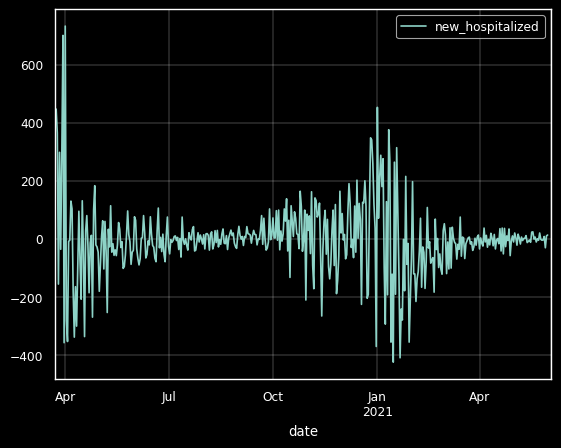

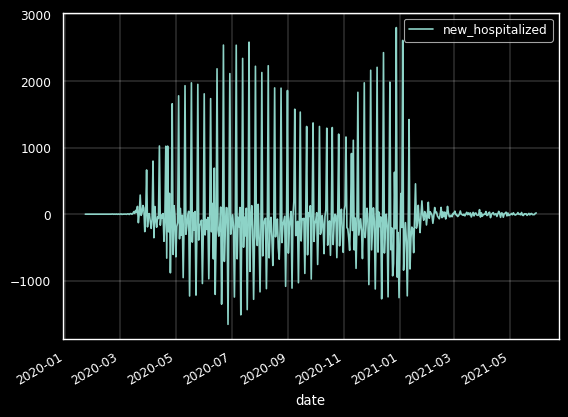

In [98]:
df = hospital[['key','date','new_hospitalized']]

pop_GB = 67886011
pop_BR = 212559417

df['date'] = df['date'].transform(lambda x: datetime.strptime(x, '%Y-%m-%d'))

# start_date = datetime.strptime('2020-03-23', '%Y-%m-%d')
# end_date = datetime.strptime('2021-03-23', '%Y-%m-%d')
# df = df[(df['date'] > start_date) & (df['date'] < end_date)]

hospital_GB = df[df['key'] == 'GB']
hospital_BR = df[df['key'] == 'BR']

hospital_GB['new_hospitalized'] = hospital_GB['new_hospitalized'].diff()#/pop_GB*1e6 # new cases/million people
hospital_BR['new_hospitalized'] = hospital_BR['new_hospitalized'].diff()#/pop_BR*1e6

hospital_GB[['date','new_hospitalized']].set_index('date').plot.line()
hospital_BR[['date','new_hospitalized']].set_index('date').plot.line()

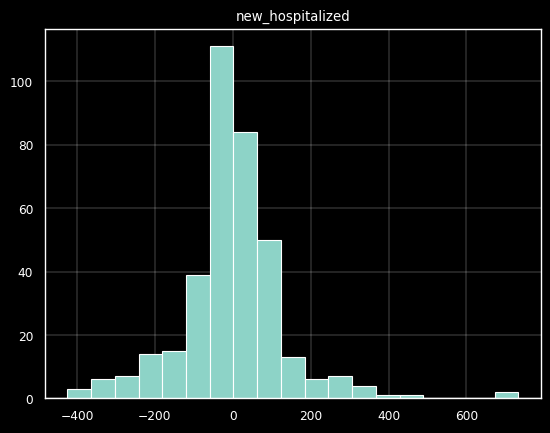

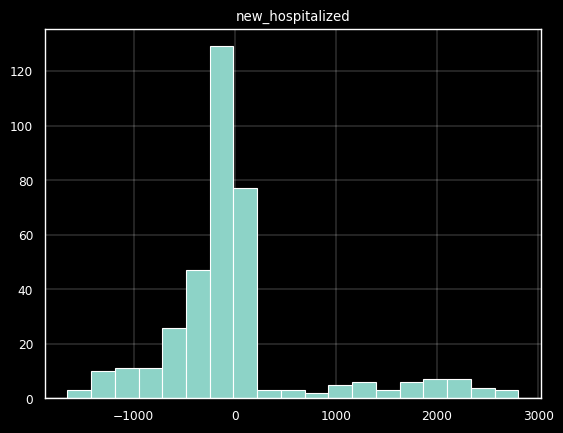

In [41]:
hospital_GB.hist(column = 'new_hospitalized',bins = int(sqrt(hospital_GB.shape[0])));
hospital_BR.hist(column = 'new_hospitalized',bins = int(sqrt(hospital_BR.shape[0])));

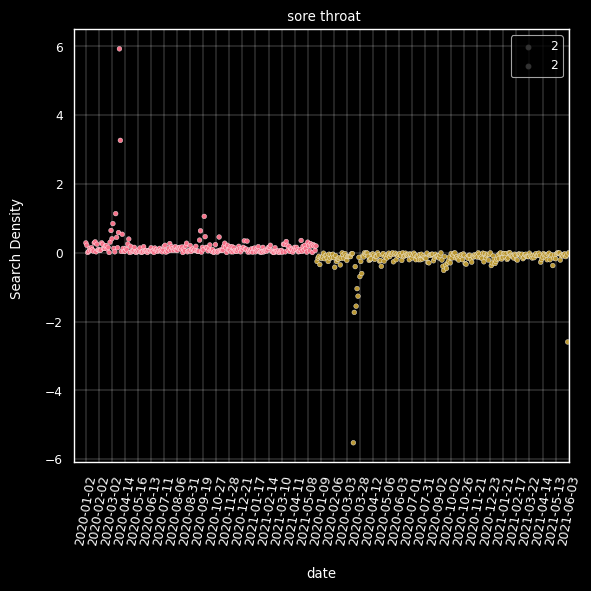

In [75]:
# df = df[(df['date'] > start_date) & (df['date'] < end_date)]

searches_cols_kd = list(searches.columns)
searches_cols = searches_cols_kd[2:]

df = clean_data(searches,hospital)
searches_GB = df[df['key'] == 'GB']
searches_by_date = searches_GB[['date'] + searches_cols].groupby('date').sum()

searches_by_date[symptom] = searches_by_date[symptom].diff()
pos_searches = searches_by_date[searches_by_date[symptom] > 0]
neg_searches = searches_by_date[searches_by_date[symptom] <= 0]

pos_searches.reset_index(inplace = True)
neg_searches.reset_index(inplace = True)

# pos_searches.sort_values(by = 'date',axis=0,inplace=True)
# neg_searches.sort_values(by = 'date',axis=0,inplace=True)

titles = [label.replace('search_trends','').replace('_',' ') for label in ylabels]

fig = plt.figure(figsize=(6,6))

matplotlib.rcParams.update(matplotlib.rcParamsDefault)

sns.set(font_scale = .7)
plt.style.use("dark_background")
sns.set_context("paper")

matplotlib.rcParams.update({'grid.linewidth': .2})

palette = itertools.cycle(sns.color_palette("husl"))
for i in range(2):
    ax = plt.subplot()
    if i == 0:
        data = pos_searches
    elif i == 1:
        data = neg_searches
    sns.scatterplot(x = "date", y = symptom,
                data = pd.DataFrame(data),
                color=next(palette),
                size = 2)
    plt.xticks(rotation=80)

    xtick_range = range(0,len(searches_by_date.index),14)
    ax.set_xlim()
    ax.set_title(titles[0])
    ax.set_xticks(xtick_range) # <--- set the ticks first
    ax.set_xlabel('date', labelpad=15)
    ax.set_ylabel('Search Density ', labelpad=15)

fig.tight_layout()
plt.show()
# fig.savefig('../img/searchs_time.png')

In [72]:
print(pos_searches.head())
print(pos_searches.tail())

         date  search_trends_sore_throat
0  2020-01-02                       0.29
1  2020-01-05                       0.22
2  2020-01-08                       0.01
3  2020-01-11                       0.04
4  2020-01-12                       0.13
           date  search_trends_sore_throat
243  2021-05-20                       0.01
244  2021-05-23                       0.24
245  2021-05-24                       0.20
246  2021-05-30                       0.07
247  2021-05-31                       0.20


<AxesSubplot:xlabel='search_trends_sore_throat', ylabel='Count'>

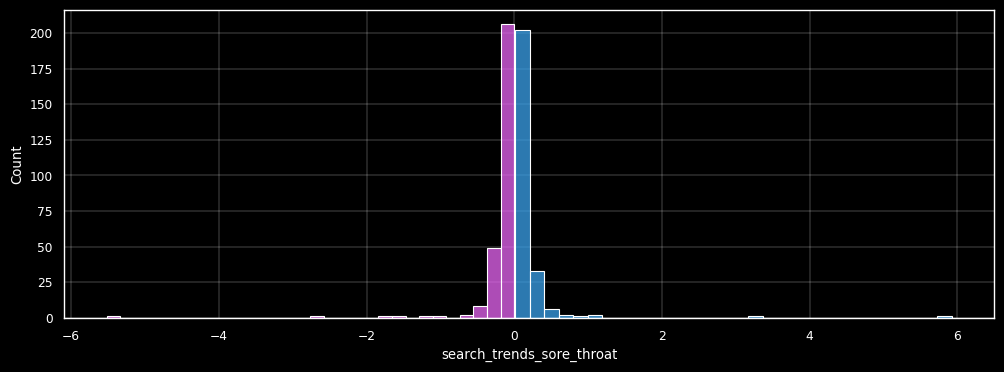

In [87]:
fig = plt.figure(figsize=(12,4))

sns.histplot(data = pos_searches[symptom],color=next(palette),bins = 2*int(sqrt(pos_searches.shape[0])))
sns.histplot(data = neg_searches[symptom],color=next(palette),bins = 2*int(sqrt(pos_searches.shape[0])))

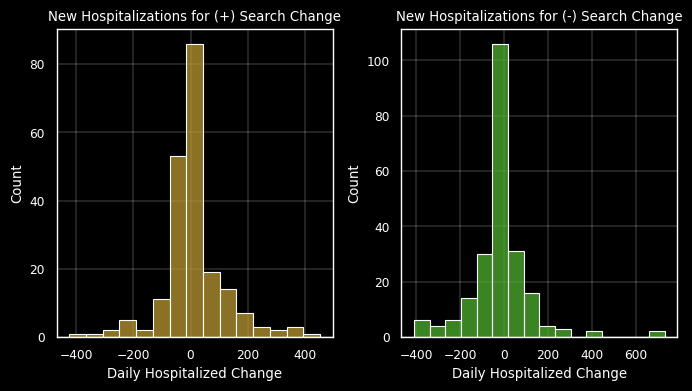

In [124]:
# pos_searches['date'] = pos_searches['date'].transform(lambda x: datetime.strptime(x, '%Y-%m-%d'))
# neg_searches['date'] = neg_searches['date'].transform(lambda x: datetime.strptime(x, '%Y-%m-%d'))

fig,axs = plt.subplots(1,2,figsize=(7,4))

inds = list([e in list(pos_searches['date']) for e in list(hospital_GB['date'])])
pos_search_hosp = hospital_GB.iloc[inds]
sns.histplot(ax = axs[0],data = pos_search_hosp[nh],color=next(palette),bins = int(sqrt(pos_searches.shape[0])))
axs[0].set_title('New Hospitalizations for (+) Search Change')
axs[0].set_xlabel('Daily Hospitalized Change')

inds = list([e in list(neg_searches['date']) for e in list(hospital_GB['date'])])
neg_search_hosp = hospital_GB.iloc[inds]
sns.histplot(ax = axs[1],data = neg_search_hosp[nh],color=next(palette),bins = int(sqrt(neg_searches.shape[0])))
axs[1].set_title('New Hospitalizations for (-) Search Change')
axs[1].set_xlabel('Daily Hospitalized Change')
fig.tight_layout()
plt.show()